## Insertion Sort vs. Python's sorted function. 

Insertion sort is a very simple sorting algorithm. 

Each item in the list is compared with every item before it. During this comparision, if the current item is smaller than any of the items before it, it is moved before the index of the bigger item in the list. 

Because of this technique, For n number of entries in the list, (n^2)/2 operations have to be performed.

See the algorithm as well benchmarking below: 

In [15]:
def insertionsort(arr):
    isString = False 
    if(isinstance(arr, str) ):
        isString = True
        arr = list(arr)
    
    def swap(arr, i, j):
        """
        More readable way to do the swap is: 
        s_i = arr[i]
        arr[i]  = arr[j]
        arr[j] = s_i
        
        See https://docs.python.org/3/reference/expressions.html#evaluation-order to understand why below works
        """
        arr[i], arr[j] = arr[j],arr[i]
        return arr

    for i in range(len(arr)):
        j = i 
        while j > 0:
            if(arr[j] < arr[j-1]):
                arr = swap(arr, j, j-1)
            j = j-1
    
    if(isString):
        return "".join(arr)
    return arr

def builtin_sort(arr):
    if(isinstance(arr, str)):
        return "".join(sorted(arr))
    return sorted(arr)


In [4]:
# Benchmarking insertion sort.
# 1 -> Call the function a bunch of time with increasing length of randomly generated string.
import random
def getRandomString(length):
    """ 60-126
    """
    def randNum():
        # return a random number between 60-126
        return random.randrange(60,126,1)
    def randNums(length):
        return [randNum() for x in range(length)]
    randInts = randNums(length)
    #print(randInts)
    randStrings = [chr(x) for x in randInts]
    return "".join(randStrings)

print(getRandomString(100))

i\E{iSiv{OWP?}Wh[E_?gOn`eBFeDutlyGFqHfDntFsp\OsCon<IE@EDBa_][I^KE=r_NAPL}lNztzu_afVNcGd>NmXgGcIcyftx


In [16]:
# Lets plot time complexity 
import time

insertion_time = [ [] , [] ] #initialize an array with two arrays. 
inbuilt_time = [ [] , [] ] #initialize an array with two arrays for inbuilt as well.

for i in range(2,500,1):
    rand_string = getRandomString(i)
    
    start_time = time.time()
    insertionsort(rand_string)
    end_time = time.time()
    diff = end_time - start_time
    insertion_time[1].append(diff)
    insertion_time[0].append(i)
    
    
    start_time = time.time()
    builtin_sort(rand_string)
    end_time = time.time() 
    diff = end_time - start_time 
    inbuilt_time[1].append(diff)
    inbuilt_time[0].append(i)

## Plots

Below are the plots for runtime complexity of both functions. 

The first one is insertion sort that I implemented. 

In the first chart, as our number of random string increase, the sorting cost increases exponentially from close to 0 to 0.025 seconds. 

In the second chart, you will notice that the cost of sorting ranges from 0 - 0.001 seconds, regardless of how long the string is.However, probablilty of taking 0.001 is higher at higher string length count.


Text(0,0.5,'Time taken to sort in seconds')

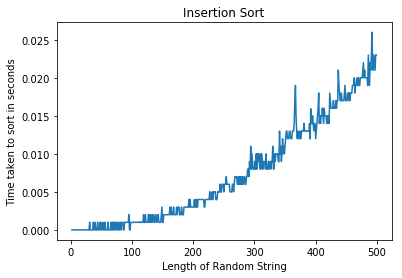

In [17]:
import matplotlib.pyplot as plt
plt.plot(insertion_time[0],insertion_time[1], label="asdfsadf")
plt.title("Insertion Sort")
plt.xlabel("Length of Random String")
plt.ylabel("Time taken to sort in seconds")

Text(0,0.5,'Time taken to sort in seconds')

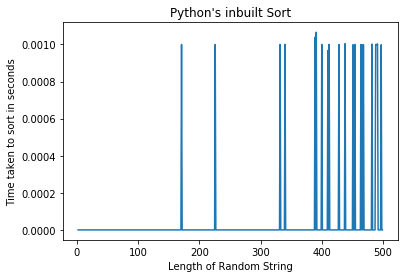

In [18]:
plt.plot(inbuilt_time[0],inbuilt_time[1])
plt.title("Python's inbuilt Sort")
plt.xlabel("Length of Random String")
plt.ylabel("Time taken to sort in seconds")

# Conclusion

Insertion sort is simple, but it is undesirable when the array lengths are high because of O(n^2) time complexity. 

In addition, it is 25 times slower than built in sorted function when number of items in the list is around 500. 
